# Discriminant by Regression
## Emre Can Açıkgöz
### November 16, 2020

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def safelog(x):
    return(np.log(x + 1e-100))

# Part1: Collect Dataset

## Importing Data

In [2]:
# Import the Dataset
X = np.genfromtxt("data_set_images.csv", delimiter = ",").astype(int)
y0 = np.genfromtxt("data_set_labels.csv", delimiter = ",", dtype = "str")

# Data Cleaning for extra ('') punctuations
y1=[]
for i in y0:
    y1.append(i.strip('"'))

# Convert str data into int 1 to 5
y = np.asarray(y1)
y = np.asarray([ord(ch) - ord('A') + 1 for ch in y])

# Get number of classes and number of samples
K = np.max(y)
N = X.shape[0]

# One-of-K encoding
Y_truth = np.zeros((N, K)).astype(int)
Y_truth[range(N), y - 1] = 1

## Create Training Set and Test Set

In [3]:
# Divide data set by assigning first 25 to Training Set and remaining 14 to Test Set

# For Class A
AX_Train = X[:25]
Ay_Train = Y_truth[:25]
AX_Test = X[25:39]
Ay_Test = Y_truth[25:39]

# For Class B
BX_Train = X[39:64]
By_Train = Y_truth[39:64]
BX_Test = X[64:78]
By_Test = Y_truth[64:78]

# For Class C
CX_Train = X[78:103]
Cy_Train = Y_truth[78:103]
CX_Test = X[103:117]
Cy_Test = Y_truth[103:117]

# For Class D
DX_Train = X[117:142]
Dy_Train = Y_truth[117:142]
DX_Test = X[142:156]
Dy_Test = Y_truth[142:156]

# For Class E
EX_Train = X[156:181]
Ey_Train = Y_truth[156:181]
EX_Test = X[181:195]
Ey_Test = Y_truth[181:195]

# Stack Training Data
X_Train = np.vstack((AX_Train, BX_Train, CX_Train, DX_Train, EX_Train))
y_Train = np.vstack((Ay_Train, By_Train, Cy_Train, Dy_Train, Ey_Train))

# Stack Test Data
X_Test = np.vstack((AX_Test, BX_Test, CX_Test, DX_Test, EX_Test))
y_Test = np.vstack((Ay_Test, By_Test, Cy_Test, Dy_Test, Ey_Test))

print(X_Train.shape)
print(X_Test.shape)
print(y_Train.shape)
print(y_Test.shape)

(125, 320)
(70, 320)
(125, 5)
(70, 5)


# Part2: Multiclass Classification

## Sigmoid Function

$\textrm{sigmoid}(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0}) = \dfrac{1}{1 + \exp\left[-(\boldsymbol{w}^{\top} \boldsymbol{x} + w_{0})\right]}$

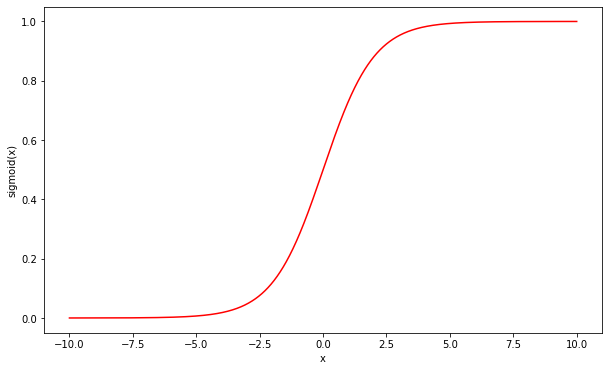

In [4]:
# Define the sigmoid function
def sigmoid(X, W, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, W) + w0))))

draw_seq = np.linspace(-10, +10, 2001)
plt.figure(figsize = (10, 6))
plt.plot(draw_seq, 1 / (1 + np.exp(-draw_seq)), "r-")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.show()


## Gradient Functions

$\triangle\boldsymbol{W}_{c} = -\sum\limits_{i = 1}^{N}  \left(y_{ic}-\widehat{y}_{ic} \right) \widehat{y}_{ic} (1-\widehat{y}_{ic})\boldsymbol {x_{i}}$

$\triangle\boldsymbol{w}_{{\boldsymbol{0}}c} = -\sum\limits_{i = 1}^{N}  \left( y_{ic}-\widehat{y}_{ic} \right) \widehat{y}_{ic} (1-\widehat{y}_{ic})$

In [5]:
# Define the gradient functions
def gradient_W(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(np.repeat((y_truth[:,c] - y_predicted[:,c])[:, None], X.shape[1], axis = 1)*np.repeat((y_predicted[:,c])[:, None], X.shape[1], axis = 1)* np.repeat((1 - y_predicted[:,c])[:, None], X.shape[1], axis = 1) * X, axis = 0) for c in range(K)]).transpose())

def gradient_w0(Y_truth, Y_predicted):
    return(-np.sum((Y_truth - Y_predicted) * (Y_predicted) * (1 - Y_predicted), axis = 0))

## Algorithm Parameters

In [6]:
# Set learning parameters
eta = 0.01
epsilon = 1e-3

## Parameter Initialization

In [7]:
# Randomly initalize W and w0
np.random.seed(421)
W = np.random.uniform(low = -0.01, high = 0.01, size = (X_Train.shape[1], K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1, K))

## Iterative Algorithm

In [8]:
# Learn W and w0 using gradient descent
iteration = 1
objective_values = []

while 1:
    
    Y_predicted = sigmoid(X_Train, W, w0)
    objective_values = np.append(objective_values, 0.5 * np.sum(((y_Train - Y_predicted)**2)))

    W_old = W
    w0_old = w0

    W = W - eta * gradient_W(X_Train, y_Train , Y_predicted)
    w0 = w0 - eta * gradient_w0(y_Train, Y_predicted)

    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((W - W_old)**2)) < epsilon:
        break

    iteration = iteration + 1
print(W)
print(w0)

[[-0.00915367 -0.08645876 -0.02578106  0.20455709 -0.03307405]
 [-0.10506662  0.00633131 -0.18885144  0.30735395  0.05693371]
 [-0.11467088  0.10982635 -0.20973779  0.2518624   0.07195246]
 ...
 [ 0.05371357  0.20412334  0.06239588 -0.23018231 -0.16727905]
 [ 0.0823532  -0.26021211  0.04268994 -0.27543447  0.01159927]
 [ 0.10247887 -0.38671481  0.13127681 -0.22816525 -0.01409047]]
[[-0.06222833 -0.29212493  0.00396509 -0.04846541 -0.25394969]]


## Convergence

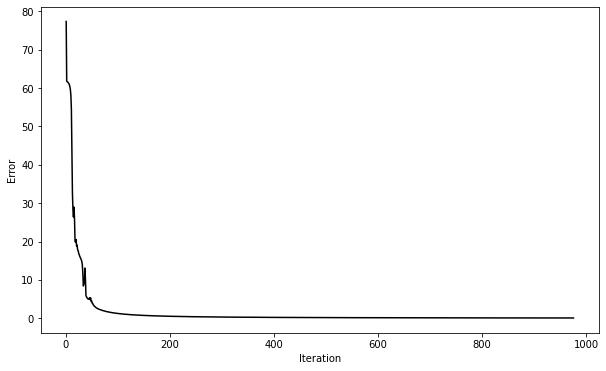

In [9]:
# Plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

# Part3: Training Performance

## Confusion Matrix Training Set

In [10]:
# Train labels Orginal (without One-Hot Encoding)
yOrg_Train = np.hstack((y[:25], y[39:64], y[78:103], y[117:142], y[156:181]))

# Calculate confusion matrix
y_predicted = np.argmax(Y_predicted, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted, yOrg_Train, rownames = ['y_predicted'], colnames = ['y_train'])
print(confusion_matrix)

y_train       1   2   3   4   5
y_predicted                    
1            25   0   0   0   0
2             0  25   0   0   0
3             0   0  25   0   0
4             0   0   0  25   0
5             0   0   0   0  25


## Confusion Matrix Test Set 

In [11]:
# Sigmoid with Test Data
Y_predicted_Test = sigmoid(X_Test, W, w0)

In [12]:
# Test labels Orginal (without One-Hot Encoding)
yOrg_Test = np.hstack((y[25:39], y[64:78], y[103:117], y[142:156], y[181:195]))

# Calculate confusion matrix
y_predicted_Test = np.argmax(Y_predicted_Test, axis = 1) + 1
confusion_matrix = pd.crosstab(y_predicted_Test, yOrg_Test, rownames = ['y_predicted'], colnames = ['y_test'])
print(confusion_matrix)

y_test        1   2   3   4   5
y_predicted                    
1            13   1   0   0   0
2             1  11   0   0   2
3             0   0  14   0   0
4             0   1   0  14   0
5             0   1   0   0  12
